# Sentiment Analysis of the HBO Show "The Last of Us"
## Introduction
In this project, I will be conducting a sentiment analysis on the HBO show, "The Last of Us", using tweets from Twitter. The purpose of this analysis is to determine the overall tone and emotions expressed by viewers in their tweets about the show. This analysis will provide insights into the general perception of the show among its viewers, helping me understand the impact it has had on them. 

The aim of this sentiment analysis is to gain insights into the viewers' opinions of The Last of Us by examining tweets with hashtags pertaining to the show, I hope to gain a better understanding of the following:

1. The positive aspects of the show that customers appreciate
2. The negative aspects of the show that customers may not be fond of
3. Any trends in viewer sentiment, such as an increase in negative tweets over time.

By gathering and analyzing this information, I will be better equipped to make informed decisions about the show.

The data is located here: https://www.kaggle.com/datasets/ulisesmontoyacanales/the-last-of-us-tweets

My process will be as follows:

- Data collection: The first step is to gather text data, such as social media posts, customer reviews, or news articles, that will be analyzed.

- Data preprocessing: The collected data is preprocessed, which involves cleaning and preparing the data for analysis. This includes removing any irrelevant information, such as stop words, special characters, and URLs.

- Frequency distribution: The frequency counts of words will be found. 

- Model fitting: A pretrained model will be fitted to the data.

- Sentiment analysis: Finally, the sentiment analysis is performed on the new text data by applying the trained machine learning model to predict the sentiment.

- Results interpretation: The results of the sentiment analysis are interpreted and used to gain insights into the opinions, emotions, and attitudes expressed in the text data.

## Dataset Features
- id: tweet id
- author_id: author twitter id
- text: the tweet
- created_at: date the tweet was created on
- like_count: number of likes
- retweet_count: number of retweets
- reply_count: number of replies
- impressions: number of times the tweet was seen
- quote_count: number of times the tweet was quoted
- lang: language

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import string
import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from transformers import pipeline
from wordcloud import WordCloud
import squarify
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/datalore/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Data Collection
In this section, I will pull the data into the workbook via pandas as a dataframe.

In [2]:
raw_tweets = pd.read_csv('TheLastOfUs_english.csv')
raw_tweets.head()

,id,author_id,text,created_at,like_count,retweet_count,reply_count,impression_count,quote_count
0,1618476065491652608,1523192548033974272,[#thelastofus #tlou #thelastofushbo]\n-\n-\ni ...,2023-01-26 05:08:58+00:00,0,0,0,16,0
1,1618472894635610116,1331935307227230210,The beauty of episode 2 🔥\n#TheLastOfUs #TheLa...,2023-01-26 04:56:22+00:00,0,0,0,38,0
2,1618472517911605248,4572075855,My REACTION to Episode 2 of #TheLastOfUs #TheL...,2023-01-26 04:54:52+00:00,2,0,0,33,0
3,1618472334284967936,1481656063808077829,Marlene and Ellie #tlou #TheLastOfUs #TheLastO...,2023-01-26 04:54:08+00:00,0,0,0,21,0
4,1618464044733845504,1591050348013228034,Thank you for the Indonesian representation!\n...,2023-01-26 04:21:12+00:00,0,0,0,31,0


In [3]:
raw_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5705 entries, 0 to 5704
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5705 non-null   int64 
 1   author_id         5705 non-null   int64 
 2   text              5705 non-null   object
 3   created_at        5705 non-null   object
 4   like_count        5705 non-null   int64 
 5   retweet_count     5705 non-null   int64 
 6   reply_count       5705 non-null   int64 
 7   impression_count  5705 non-null   int64 
 8   quote_count       5705 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 401.3+ KB


## Data Preprocessing
In this section, I will be removing special characters, punctuation, stop words, and URLs. I will also be replacing contractions and lowercasing all words.     

In [4]:
# Removing special characters (emojis, hashtags, and all other special symbols)
# Removing hashtags from the text column
clean_tweets = raw_tweets

# Removing all hashtags and mentions
clean_tweets['text'] = clean_tweets['text'].str.replace("@[A-Za-z0-9_]+",'', regex=True)
clean_tweets['text'] = clean_tweets['text'].str.replace("#[A-Za-z0-9_]+",'', regex=True)
clean_tweets.head()

<ipython-input-4-da1fbfda0885>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_tweets['text'] = clean_tweets['text'].str.replace("@[A-Za-z0-9_]+",'')
<ipython-input-4-da1fbfda0885>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_tweets['text'] = clean_tweets['text'].str.replace("#[A-Za-z0-9_]+",'')


,id,author_id,text,created_at,like_count,retweet_count,reply_count,impression_count,quote_count
0,1618476065491652608,1523192548033974272,[ ]\n-\n-\ni wanted to edit tlou but im feeli...,2023-01-26 05:08:58+00:00,0,0,0,16,0
1,1618472894635610116,1331935307227230210,The beauty of episode 2 🔥\n https://t.co/QTYx...,2023-01-26 04:56:22+00:00,0,0,0,38,0
2,1618472517911605248,4572075855,My REACTION to Episode 2 of . I share my favo...,2023-01-26 04:54:52+00:00,2,0,0,33,0
3,1618472334284967936,1481656063808077829,Marlene and Ellie https://t.co/Y1pInl9ok2,2023-01-26 04:54:08+00:00,0,0,0,21,0
4,1618464044733845504,1591050348013228034,Thank you for the Indonesian representation!\n...,2023-01-26 04:21:12+00:00,0,0,0,31,0


In [5]:
# Removing URLs
clean_tweets['text'] = clean_tweets['text'].str.replace('https?:\/\/.\S+', '', regex=True)
clean_tweets.head()

,id,author_id,text,created_at,like_count,retweet_count,reply_count,impression_count,quote_count
0,1618476065491652608,1523192548033974272,[ ]\n-\n-\ni wanted to edit tlou but im feeli...,2023-01-26 05:08:58+00:00,0,0,0,16,0
1,1618472894635610116,1331935307227230210,The beauty of episode 2 🔥\n,2023-01-26 04:56:22+00:00,0,0,0,38,0
2,1618472517911605248,4572075855,My REACTION to Episode 2 of . I share my favo...,2023-01-26 04:54:52+00:00,2,0,0,33,0
3,1618472334284967936,1481656063808077829,Marlene and Ellie,2023-01-26 04:54:08+00:00,0,0,0,21,0
4,1618464044733845504,1591050348013228034,Thank you for the Indonesian representation!\n...,2023-01-26 04:21:12+00:00,0,0,0,31,0


In [6]:
# Removing all special characters
clean_tweets['text'] = clean_tweets['text'].str.replace('[^\w\s]', '', regex=True)
clean_tweets['text'].head()

0 \n\n\ni wanted to edit tlou but im feeling l...
1 The beauty of episode 2 \n 
2 My REACTION to Episode 2 of I share my favor...
3 Marlene and Ellie 
4 Thank you for the Indonesian representation\nT...
Name: text, dtype: object

In [7]:
clean_tweets['text'].tail(10)

5695 YouTube Tipp \n Heute um 1700 Uhr \nThe Last ...
5696 Sky Exclusive The Last Of Us review by Con  ...
5697 Daddys going to bed goodnight 
5698 15 years Con at The Last Of Us Immersive Scree...
5699 Im seriously impressed by     Best video game ...
5700 OMG ITS MY QUEEN FROM FRINGE ANNA TORV 
5701 A few more wins from our group chat tonight ...
5702 A Fathers Love Building The Last of Us Episod...
5703 The Last of Us Birthday Card Easter Egg 
5704 Sunday needs to hurry up I need to see more 
Name: text, dtype: object

In [9]:
# Getting rid of extra whitespace
clean_tweets['text'] = clean_tweets['text'].str.strip()

In [11]:
clean_tweets['text'].tail(10)

5695 YouTube Tipp \n Heute um 1700 Uhr \nThe Last ...
5696 Sky Exclusive The Last Of Us review by Con
5697 Daddys going to bed goodnight
5698 15 years Con at The Last Of Us Immersive Scree...
5699 Im seriously impressed by     Best video game ...
5700 OMG ITS MY QUEEN FROM FRINGE ANNA TORV
5701 A few more wins from our group chat tonight
5702 A Fathers Love Building The Last of Us Episode 1
5703 The Last of Us Birthday Card Easter Egg
5704 Sunday needs to hurry up I need to see more
Name: text, dtype: object

In [12]:
# Lowercasing all tweets.
clean_tweets['text'] = clean_tweets['text'].apply(str.lower)
clean_tweets.head(10)

,id,author_id,text,created_at,like_count,retweet_count,reply_count,impression_count,quote_count
0,1618476065491652608,1523192548033974272,i wanted to edit tlou but im feeling lazy so h...,2023-01-26 05:08:58+00:00,0,0,0,16,0
1,1618472894635610116,1331935307227230210,the beauty of episode 2,2023-01-26 04:56:22+00:00,0,0,0,38,0
2,1618472517911605248,4572075855,my reaction to episode 2 of i share my favor...,2023-01-26 04:54:52+00:00,2,0,0,33,0
3,1618472334284967936,1481656063808077829,marlene and ellie,2023-01-26 04:54:08+00:00,0,0,0,21,0
4,1618464044733845504,1591050348013228034,thank you for the indonesian representation\nt...,2023-01-26 04:21:12+00:00,0,0,0,31,0
5,1618463867222253568,1607840491004956673,the last of us part i,2023-01-26 04:20:30+00:00,0,0,0,40,0
6,1618460752540749827,16048448,finally got around to watching why are there ...,2023-01-26 04:08:07+00:00,0,0,0,29,0
7,1618459517045600256,1052764526997733376,ive watched the second episode of twice and o...,2023-01-26 04:03:13+00:00,0,0,0,46,0
8,1618458894883512322,1584211871946547200,caught in a glitch,2023-01-26 04:00:44+00:00,0,0,0,43,0
9,1618456385884393475,1158242959092883456,that helped propel the original game to a ne...,2023-01-26 03:50:46+00:00,0,0,0,28,0


In [13]:
# Expand contractions
clean_tweets['text'] = clean_tweets['text'].apply(lambda x:[contractions.fix(bit) for bit in x.split()])
clean_tweets.head(10)

,id,author_id,text,created_at,like_count,retweet_count,reply_count,impression_count,quote_count
0,1618476065491652608,1523192548033974272,"[i, wanted, to, edit, tlou, but, i am, feeling...",2023-01-26 05:08:58+00:00,0,0,0,16,0
1,1618472894635610116,1331935307227230210,"[the, beauty, of, episode, 2]",2023-01-26 04:56:22+00:00,0,0,0,38,0
2,1618472517911605248,4572075855,"[my, reaction, to, episode, 2, of, i, share, m...",2023-01-26 04:54:52+00:00,2,0,0,33,0
3,1618472334284967936,1481656063808077829,"[marlene, and, ellie]",2023-01-26 04:54:08+00:00,0,0,0,21,0
4,1618464044733845504,1591050348013228034,"[thank, you, for, the, indonesian, representat...",2023-01-26 04:21:12+00:00,0,0,0,31,0
5,1618463867222253568,1607840491004956673,"[the, last, of, us, part, i]",2023-01-26 04:20:30+00:00,0,0,0,40,0
6,1618460752540749827,16048448,"[finally, got, around, to, watching, why, are,...",2023-01-26 04:08:07+00:00,0,0,0,29,0
7,1618459517045600256,1052764526997733376,"[i have, watched, the, second, episode, of, tw...",2023-01-26 04:03:13+00:00,0,0,0,46,0
8,1618458894883512322,1584211871946547200,"[caught, in, a, glitch]",2023-01-26 04:00:44+00:00,0,0,0,43,0
9,1618456385884393475,1158242959092883456,"[that, helped, propel, the, original, game, to...",2023-01-26 03:50:46+00:00,0,0,0,28,0


In [14]:
clean_tweets['text'] = clean_tweets['text'].astype('str')
clean_tweets['text'] = clean_tweets['text'].apply(eval).apply(' '.join)
clean_tweets.dtypes

id int64
author_id int64
text object
created_at object
like_count int64
retweet_count int64
reply_count int64
impression_count int64
quote_count int64
dtype: object

In [15]:
clean_tweets['text'].head()

0 i wanted to edit tlou but i am feeling lazy so...
1 the beauty of episode 2
2 my reaction to episode 2 of i share my favorit...
3 marlene and ellie
4 thank you for the indonesian representation th...
Name: text, dtype: object

In [17]:
# Removing stop words.
stop_words = stopwords.words('english')
clean_tweets['text'] = clean_tweets['text'].apply(lambda x:' '.join([alpha for alpha in x.split() if alpha not in (stop_words)]))

In [18]:
clean_tweets['text'].tail(10)

5695 youtube tipp heute um 1700 uhr last us cast su...
5696 sky exclusive last us review con
5697 daddys going bed goodnight
5698 15 years con last us immersive screening
5699 seriously impressed best video game adaption e...
5700 omg queen fringe anna torv
5701 wins group chat tonight
5702 fathers love building last us episode 1
5703 last us birthday card easter egg
5704 sunday needs hurry need see
Name: text, dtype: object

In [19]:
# Removing numbers
clean_tweets['text'] = clean_tweets['text'].str.replace('\d', '', regex=True)

In [20]:
clean_tweets['text'].head(10)

0 wanted edit tlou feeling lazy something simple
1 beauty episode 
2 reaction episode share favorite parts critici...
3 marlene ellie
4 thank indonesian representation show solid far
5 last us part
6 finally got around watching episodes far want...
7 watched second episode twice second viewing fe...
8 caught glitch
9 helped propel original game new height still s...
Name: text, dtype: object

In [21]:
# Finding unique words
uniqueWords = clean_tweets['text'].nunique()

# Find the total amount of words.
clean_tweets['total_words'] = clean_tweets['text'].str.split().str.len()
total_words = clean_tweets['total_words'].sum()

uniqueWords

5010

## Frequency Distribution
In this section I will be visualizing the frequency of unique words in the dataset.

In [22]:
# Tokenize the tweet text
tokenized_words = clean_tweets['text'].apply(word_tokenize)
tokenized_words

0 [wanted, edit, tlou, feeling, lazy, something,...
1 [beauty, episode]
2 [reaction, episode, share, favorite, parts, cr...
3 [marlene, ellie]
4 [thank, indonesian, representation, show, soli...
 ... 
5700 [omg, queen, fringe, anna, torv]
5701 [wins, group, chat, tonight]
5702 [fathers, love, building, last, us, episode]
5703 [last, us, birthday, card, easter, egg]
5704 [sunday, needs, hurry, need, see]
Name: text, Length: 5705, dtype: object

In [23]:

# Turn tokenized_words into list of tokens
tokenized_word_list = []

for list in tokenized_words:
    for word in list:
        tokenized_word_list.append(word)

In [24]:
# Create a frequency distribution from the word list.

f_dist = FreqDist(tokenized_word_list)
f_dist

FreqDist({'episode': 1493, 'us': 1352, 'last': 1264, 'game': 801, 'show': 564, 'ellie': 397, 'tess': 373, 'like': 343, 'joel': 316, 'one': 294, ...})

In [25]:
# Most common words
f_dist.most_common(10)
f_dist

FreqDist({'episode': 1493, 'us': 1352, 'last': 1264, 'game': 801, 'show': 564, 'ellie': 397, 'tess': 373, 'like': 343, 'joel': 316, 'one': 294, ...})

/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.

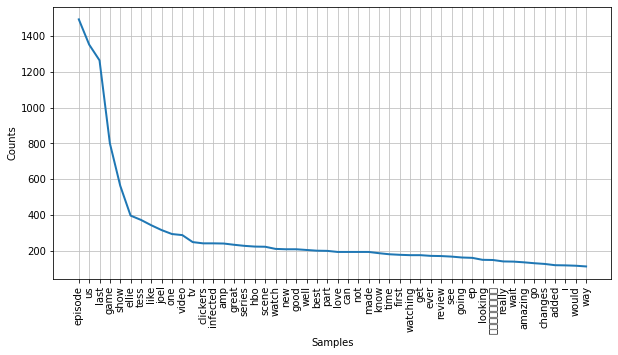

In [26]:
# Plot the distribution
plt.figure(figsize=(10,5))
f_dist.plot(50, cumulative=False)
plt.show()

## Model Fitting
In this section, I will be fitting the cleaned tweets to the roBERTa model.

In [27]:
# Defining the model
model = pipeline(model='cardiffnlp/twitter-roberta-base-sentiment')

In [29]:
clean_tweets['text'].count()

5705

In [30]:
# Testing the model on one tweet.
test_sentiment = model(clean_tweets['text'][4000])
#test_sentiment[0]['label']
test_sentiment[0]['score']

0.9785115122795105

In [31]:
# Getting a sample size of the data to run a sentiment analysis on.
sample = clean_tweets.sample(frac=.104)
sample.count()

id 593
author_id 593
text 593
created_at 593
like_count 593
retweet_count 593
reply_count 593
impression_count 593
quote_count 593
total_words 593
dtype: int64

In [32]:
# Running the sentiment analysis on the sample
tweets = []

for tweet in sample['text']:
    content = tweet
    sentiment = model(tweet)
    tweets.append({'tweet': content,
                   'sentiment':sentiment[0]['label'],
                   'score':test_sentiment[0]['score']})

## Sentiment Analysis
In this section, I will explore the results of the sentiment analysis by loading the results into a dataframe and visualizing them.

In [34]:
# Load into pandas dataframe
sa_tweets_df = pd.DataFrame(tweets)
sa_tweets_df.head(10)

,tweet,sentiment,score
0,win emmys outrage episode wow,LABEL_2,0.978512
1,sillies,LABEL_1,0.978512
2,paying forward drop link follow rt surprise,LABEL_2,0.978512
3,sperm,LABEL_1,0.978512
4,series perfectly captures horrifying details r...,LABEL_0,0.978512
5,prepared tess dying never thought would hit hard,LABEL_0,0.978512
6,another excellent episode much unfolds feeli...,LABEL_2,0.978512
7,popular opinion last us show sucks much game,LABEL_0,0.978512
8,joel last us part,LABEL_1,0.978512
9,last us episode passes mentally prepare sam he...,LABEL_1,0.978512


In [35]:
# Change labels based on table provided at https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment
# LABEL_0 -> Negative
# LABEL_1 -> Neutral
# LABEL_2 -> Positive

def replace_labels(df):
    df['sentiment'] = df['sentiment'].replace('LABEL_0', 'Negative')
    df['sentiment'] = df['sentiment'].replace('LABEL_1', 'Neutral')
    df['sentiment'] = df['sentiment'].replace('LABEL_2', 'Positive')
    return df

labeled_tweets_df = replace_labels(sa_tweets_df)

In [36]:
labeled_tweets_df

,tweet,sentiment,score
0,win emmys outrage episode wow,Positive,0.978512
1,sillies,Neutral,0.978512
2,paying forward drop link follow rt surprise,Positive,0.978512
3,sperm,Neutral,0.978512
4,series perfectly captures horrifying details r...,Negative,0.978512
...,...,...,...
588,hottie,Negative,0.978512
589,things know bria jones,Neutral,0.978512
590,episode premieres hours focus mostly infecte...,Neutral,0.978512
591,find full details,Neutral,0.978512


In [37]:
# Show descriptive statistics
labeled_tweets_df['score'].describe()

count 593.000000
mean 0.978512
std 0.000000
min 0.978512
25% 0.978512
50% 0.978512
75% 0.978512
max 0.978512
Name: score, dtype: float64

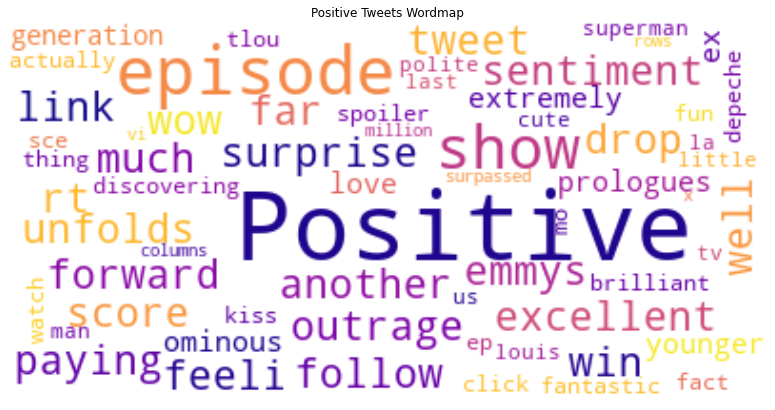

In [39]:
# Create wordclouds of positive and negative tweets
positive = labeled_tweets_df[labeled_tweets_df['tweet'] != 'thelastofus'][labeled_tweets_df['sentiment'] == 'Positive']
positive_wordcloud = WordCloud(max_font_size=50, max_words=1000, 
                               background_color='white', colormap='plasma', stopwords=stop_words).generate(str(positive))
plt.figure(figsize=(15,7))
plt.title('Positive Tweets Wordmap')
plt.axis('off')
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.show()

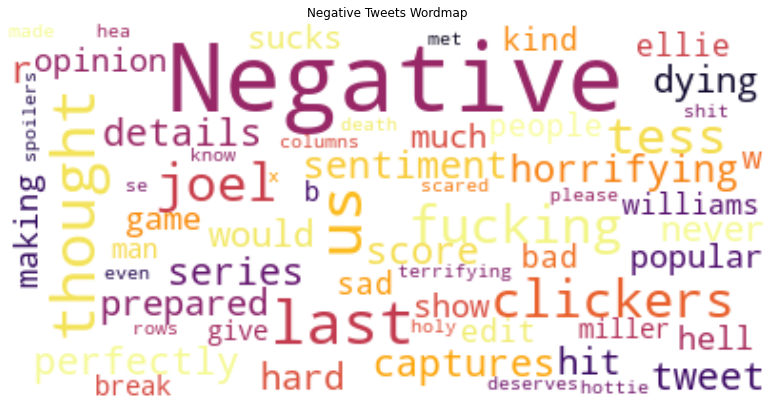

In [40]:
negative = labeled_tweets_df[labeled_tweets_df['tweet'] != 'thelastofus'][labeled_tweets_df['sentiment'] == 'Negative']
negative_wordcloud = WordCloud(max_font_size=50, max_words=1000
                               , background_color='white', colormap='inferno', stopwords=stop_words).generate(str(negative))
plt.figure(figsize=(15,7))
plt.title('Negative Tweets Wordmap')
plt.axis('off')
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.show()

In [41]:
# Comparing the amount of positive tweets to negative and neutral tweets.
# Count the amount of neutral, negative, and positive tweets.

labeled_tweets_df['tweet'][labeled_tweets_df['sentiment'] == 'Positive'].count()

def count_sentiment(df):
    positive = df['tweet'][df['sentiment'] == 'Positive'].count()
    negative = df['tweet'][df['sentiment'] == 'Negative'].count()
    neutral = df['tweet'][df['sentiment'] == 'Neutral'].count()
    return print(f"positive: {positive}, negative:{negative}, neutral:{neutral}")

count_sentiment(labeled_tweets_df)


positive: 164, negative:90, neutral:339


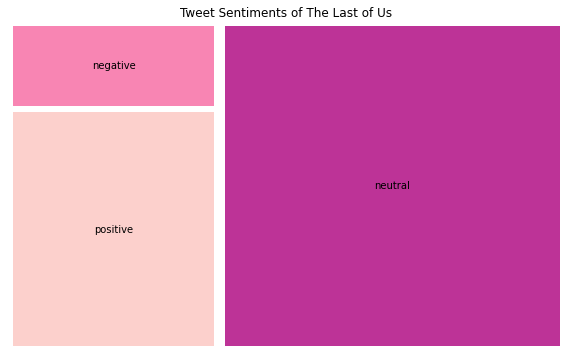

In [42]:
# Create a dataframe with counts
df = pd.DataFrame({'counts':[166,60,367], 'sentiment':['positive', 'negative', 'neutral']})

# Create a treemap
plt.figure(figsize=(10,6))
squarify.plot(sizes=df['counts'], label=df['sentiment'], alpha=.8, color=sns.color_palette('RdPu', len(df)), pad=2)
plt.title('Tweet Sentiments of The Last of Us')
plt.axis('off')
plt.show()

## Results Interpretation

Based on the sentiment analysis of tweets about the HBO show "The Last of Us", it can be concluded that the majority of tweets have a neutral sentiment. Positive sentiment is the second largest group, with positive words such as "positive," "episode," "show," and "surprise" appearing frequently. On the other hand, negative sentiment is also present, with negative words such as "negative," "thought," "last," and "Joel" being the most frequently used. These results suggest that the show is receiving a mix of both positive and negative reactions, with more neutral opinions being expressed overall.

# Conclusion
In conclusion, the sentiment analysis of tweets about the HBO show "The Last of Us" reveals a mixed response from the audience. While the majority of tweets have a neutral sentiment, both positive and negative opinions are present. Words such as "positive," "episode," "show," and "surprise" indicate positive sentiment, while words like "negative," "thought," "last," and "Joel" express negative sentiment. Overall, these results suggest that the show is eliciting a variety of reactions from viewers, with neutral opinions being the most common.